# Exercise: 311 Requests

#### Summary

In NYC, you can call 311 with *anything* about the city - questions, complaints, etc. We'll be analyzing requests from 2015-2016 from the Department of Transportation and NYPD.

#### Data Source(s)

Filtered from full set, https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

#### Files

- `311-requests/311_Service_Requests_from_2010_to_Present.csv`, about 1.8 million rows (over 1GB of data)

#### Data dictionary

Visit [this page](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9#schema-preview) and click 'Show more' on the bottom right of the list (53 columns).

#### Skills

- Opening large files
- Time

## Opening the file

It's a big one! If your computer is slow or you only have 2GB of RAM, you might want to specify `nrows=50000` (or less). Increase the number until it takes around 20 seconds, maybe!

In [122]:
%%time
%matplotlib inline
import pandas as pd
# df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv")#, nrows=50000)

CPU times: user 2.2 ms, sys: 4.44 ms, total: 6.64 ms
Wall time: 12.4 ms


In [102]:
# df.shape

(1844278, 53)

### Measuring time in Jupyter Notebooks

How long did that take? Read it in again, but this time **time how long it takes.** (and no, not with your watch - with Jupyter!)

In [124]:
# %%time
# df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv", nrows=50000)

### Look at the first few rows

Make sure you can see **every single column.**

In [104]:
# pd.set_option('display.max_columns', 99)

In [123]:
# df.head()

### Speeding things up

We're going to be looking at open and close times, agencies, and the complaints (both types and descriptor). The only kind of location-based thing we'll want is borough.

**How much faster is it if we only read in those columns?**

In [121]:
%%time
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv", usecols=["Created Date", "Closed Date", "Agency", "Complaint Type", "Descriptor", "Borough"])

CPU times: user 14.8 s, sys: 1.23 s, total: 16 s
Wall time: 16.6 s


## Converting the 'Created Date' and 'Closed Date' columns to datetimes

### First, testing some things out

Let's take a look at converting **Created Date**, but **not all at once**.

1. Take 10,000 of them and try to convert them **without** a format string. Time it.
2. Take the same 10,000 and try to convert them **with** a format string. Time it.

If you tried to do all 1.8 million rows, **how long might it take with a format string vs without?**

In [128]:
df.shape

(1844278, 6)

### Creating new columns

Create new columns called `created_at` and `closed_at` from the `Created Date` and `Closed Date` columns. Do them individually, and **time them**.

In [129]:
%%time
df['created_at'] = pd.to_datetime(df['Created Date'], format = "%m/%d/%Y %X %p")

CPU times: user 11.8 s, sys: 107 ms, total: 11.9 s
Wall time: 11.9 s


In [130]:
%%time
df['closed_at'] = pd.to_datetime(df['Closed Date'], format = "%m/%d/%Y %X %p")

CPU times: user 10.8 s, sys: 104 ms, total: 10.9 s
Wall time: 10.9 s


### Confirming they look okay

Take a look at the first few rows to make sure the dates look correct, and then make sure their data type is `datetime64[ns]`.

In [131]:
df.dtypes

Created Date              object
Closed Date               object
Agency                    object
Complaint Type            object
Descriptor                object
Borough                   object
created_at        datetime64[ns]
closed_at         datetime64[ns]
dtype: object

In [111]:
#df.set_index("date", inplace = True)

# Examining agencies

Who has more 311 requests, the Department of Transportation or the NYPD?

In [132]:
df['Agency'].value_counts()

NYPD    1251121
DOT      593157
Name: Agency, dtype: int64

## What's the difference between "Complaint Type" and "Descriptor" columns?

In [134]:
df.head()
#Type is more general, Descriptor is more dtailed.

,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,created_at,closed_at
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-04 10:55:25,2015-09-05 02:06:54
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 01:53:45,2015-09-04 06:37:24
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 09:15:43,2015-09-04 10:32:01
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,Noise - Commercial,Loud Music/Party,BROOKLYN,2015-09-05 01:06:57,2015-09-05 02:26:43
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 07:48:25,2015-09-04 05:21:18


## What are the most popular categories of complaints for the NYPD? For the DOT?

In [135]:
df.groupby('Agency')['Complaint Type'].value_counts().groupby(level=0).head()
#df[df['Agency' ] == 'NYPD']['Complaint Type'].value_counts()

Agency  Complaint Type          
DOT     Street Condition            215052
        Street Light Condition      187228
        Traffic Signal Condition     79737
        Broken Muni Meter            47234
        Street Sign - Damaged        12041
NYPD    Noise - Residential         429932
        Blocked Driveway            219927
        Illegal Parking             215158
        Noise - Street/Sidewalk     112890
        Noise - Commercial           93115
Name: Complaint Type, dtype: int64

## When people are complaining about street conditions, what are they usually complaining about?

In [136]:
df[df['Complaint Type'] == 'Street Condition']['Descriptor'].value_counts()

Pothole                           137931
Cave-in                            22026
Rough, Pitted or Cracked Roads     12150
Defective Hardware                 11206
Failed Street Repair                9408
Blocked - Construction              7034
Line/Marking - Faded                5230
Plate Condition - Noisy             3405
Wear & Tear                         2555
Plate Condition - Shifted           2004
Plate Condition - Open               671
Line/Marking - After Repaving        513
Dumpster - Construction Waste        181
Hummock                              177
Guard Rail - Street                  145
Crash Cushion Defect                 118
Maintenance Cover                     85
Unsafe Worksite                       56
Depression Maintenance                39
Strip Paving                          34
Plate Condition - Anti-Skid           25
Dumpster - Causing Damage             17
General Bad Condition                 15
Defacement                            15
Suspected Street

## What kinds of noise are they complaining about when making residential noise complaints?

In [137]:
df[df['Complaint Type'] == 'Noise - Residential']['Descriptor'].value_counts()

Loud Music/Party    283631
Banging/Pounding    108470
Loud Talking         30097
Loud Television       7734
Name: Descriptor, dtype: int64

# Timing our complaints

How many complaints were filed each month?

- Tip: You'll probably want to `.set_index` first!

In [139]:
df.set_index("created_at", inplace = True)

In [140]:
df.shape

(1844278, 7)

In [159]:
#resample functions like groupby.
df.resample('M').count()

,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,closed_at
created_at,,,,,,,
2015-01-31,58168,57932,58168,58168,57968,58168,57932
2015-02-28,59895,59663,59895,59895,59763,59895,59663
2015-03-31,87190,86753,87190,87190,86902,87190,86753
2015-04-30,78002,77626,78002,78002,77614,78002,77626
2015-05-31,87582,86677,87582,87582,86909,87582,86677
2015-06-30,84486,83924,84486,84486,83812,84486,83924
2015-07-31,77795,76561,77795,77795,76889,77795,76561
2015-08-31,78793,78286,78793,78793,77917,78793,78286
2015-09-30,78317,77764,78317,78317,77475,78317,77764


## Plot how many requests were filed each month

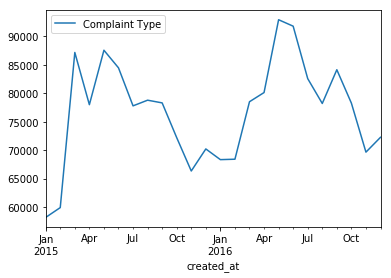

In [152]:
df.resample('M').count().plot(y='Complaint Type')

# Hmmm, it looks like a cycle

What could cause that? Try a couple comparisons to see if you can find out.

- Tip: Maybe the most popular summer complaints vs winter
- Tip: Maybe graphing the different agencies on the same graph

If you don't figure it out **that's okay!** 

## Time of day

### What time of day do people complain?

In [214]:
#df.resample('H').count() ... This gives every hour of the day over the course of two years.
df.groupby(df.index.hour).count().sort_values(by='Created Date', ascending = False) #.plot(y='Complaint Type')

,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,closed_at
created_at,,,,,,,
11,232162,230883,232162,232162,230943,232162,230883
10,218008,216882,218008,218008,216579,218008,216882
12,192942,191730,192942,192942,191884,192942,191730
9,187637,186512,187637,187637,186167,187637,186512
8,159947,158980,159947,159947,158480,159947,158980
1,155368,153909,155368,155368,154477,155368,153909
2,143361,142049,143361,143361,142492,143361,142049
7,132544,131338,132544,132544,131309,132544,131338
3,118681,117687,118681,118681,117787,118681,117687


### What time of day do people complain about potholes?

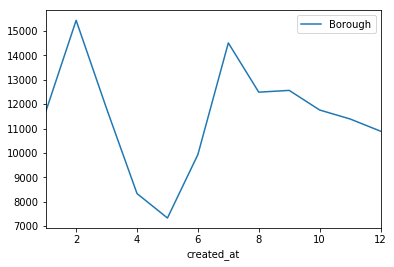

In [274]:
df[df['Descriptor'] == 'Pothole'].groupby(by=df[df['Descriptor'] == 'Pothole'].index.hour).count().plot(y="Borough")

### What time of day do people complain about loud parties?

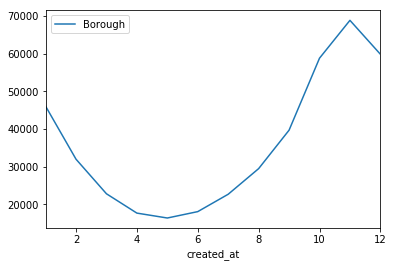

In [275]:
df[df['Descriptor'] == 'Loud Music/Party'].groupby(by=df[df['Descriptor'] == 'Loud Music/Party'].index.hour).count().plot(y="Borough")

## Days of the week

### What days of the week do people complain about potholes?

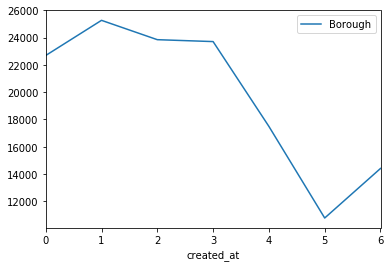

In [277]:
df[df['Descriptor'] == 'Pothole'].groupby(by=df[df['Descriptor'] == 'Pothole'].index.dayofweek).count().plot(y="Borough")

### What days of the week do people complain about loud parties?

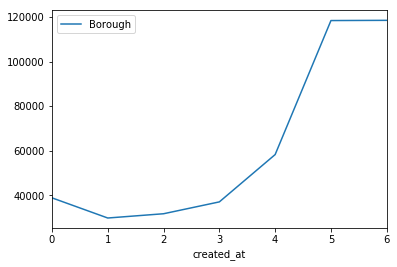

In [279]:
df[df['Descriptor'] == 'Loud Music/Party'].groupby(by=df[df['Descriptor'] == 'Loud Music/Party'].index.dayofweek).count().plot(y="Borough")

### What do you think is the best kind of graph for describing day of the week complaints?

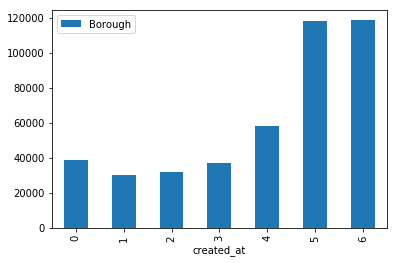

In [281]:
df[df['Descriptor'] == 'Loud Music/Party'].groupby(by=df[df['Descriptor'] == 'Loud Music/Party'].index.dayofweek).count().plot(kind = 'bar', y="Borough")

# Some more investigation

## Are there more homeless people in the city in the summer or in the winter?

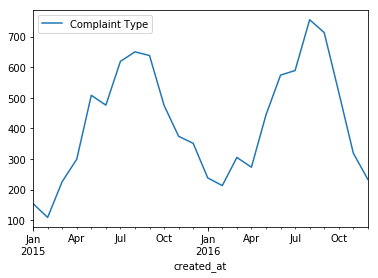

In [336]:
df[df['Complaint Type'] == 'Homeless Encampment'].sort_index().resample('M').count().plot(y='Complaint Type')

## What holiday(s) are most popular for illegal fireworks?

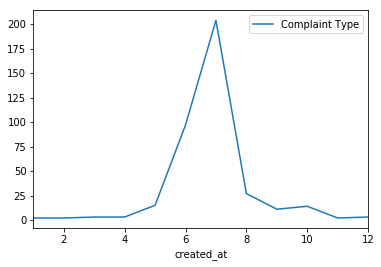

In [357]:
df[df['Complaint Type'] == 'Illegal Fireworks'].groupby(by=df[df['Complaint Type'] == 'Illegal Fireworks'].index.month).count().plot(y = 'Complaint Type')

In [ ]:
#or df[df['Complaint Type'] == 'Illegal Fireworks'].sort_index().resample('M').count().plot(y='Complaint Type')

## Plot all kinds of noise complaints on top of each other

In [389]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

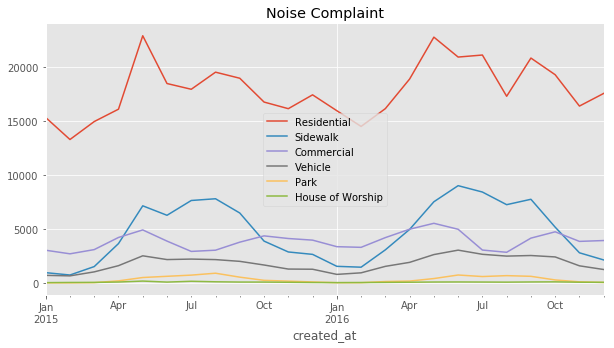

In [414]:
fig, ax = plt.subplots(figsize = (10, 5))

df[df['Complaint Type'] == "Noise - Residential"].sort_index().resample("M").count().plot(y= 'Complaint Type', label = "Residential", ax=ax)
df[df['Complaint Type'] == "Noise - Street/Sidewalk"].sort_index().resample("M").count().plot(y= 'Complaint Type', label = "Sidewalk", ax=ax)
df[df['Complaint Type'] == "Noise - Commercial"].sort_index().resample("M").count().plot(y= 'Complaint Type', label = "Commercial", ax=ax)
df[df['Complaint Type'] == "Noise - Vehicle"].sort_index().resample("M").count().plot(y= 'Complaint Type', label = "Vehicle", ax=ax)
df[df['Complaint Type'] == "Noise - Park"].sort_index().resample("M").count().plot(y= 'Complaint Type', label = "Park", ax=ax)
df[df['Complaint Type'] == "Noise - House of Worship"].sort_index().resample("M").count().plot(y= 'Complaint Type', label = "House of Worship", ax=ax)

ax.set_title("Noise Complaint")

